In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io


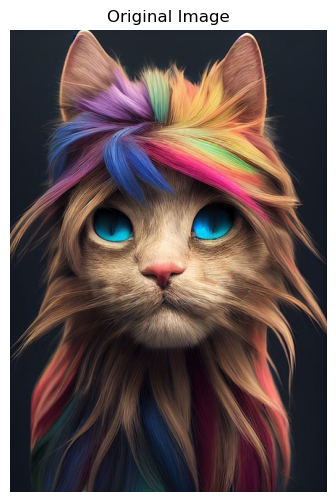

In [25]:
# Load the image
image_path = 'C:\\Users\\Nolan Bowen\\Downloads\\cat-7492226_640.jpg'
image = io.imread(image_path)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Original Image')
plt.show()


In [26]:
# Reshape the image to be a list of RGB pixels
reshaped_image = image.reshape((-1, 3))  # -1 means automatically determine the size based on other dimensions


In [27]:
# Define the number of colors (clusters) for compression
n_colors = 16

# Create K-means clustering model
kmeans = KMeans(n_clusters=n_colors, random_state=42)

# Fit K-means model to the reshaped image data
kmeans.fit(reshaped_image)


z:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=16, random_state=42)

In [28]:
# Predict the closest cluster each pixel belongs to
quantized_colors = kmeans.predict(reshaped_image)

# Replace each pixel with its corresponding cluster center (quantized color)
compressed_image = kmeans.cluster_centers_[quantized_colors]

# Reshape the compressed image back to its original shape
compressed_image = compressed_image.reshape(image.shape)


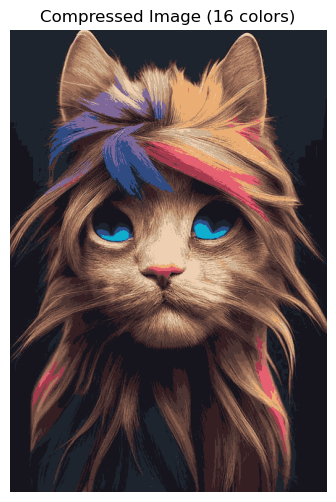

In [29]:
# Display the compressed image
plt.figure(figsize=(8, 6))
plt.imshow(compressed_image.astype(np.uint8))
plt.axis('off')
plt.title(f'Compressed Image ({n_colors} colors)')
plt.show()
